<a href="https://colab.research.google.com/github/Nabakindagrace/gracenabakinda_codes/blob/main/Nabakinda_Grace_ML_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###imprting libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
## mounting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##importing the dataset into the notebook
data=pd.read_csv('/content/drive/MyDrive/ML-EXAM/loan_data.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
#Checking Data Types
data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
# Checking for duplicates
print(data.duplicated().sum())


0


In [ ]:
##checking for missing values
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
##Tagets and features
y=data['Loan_Status']
x=data.drop('Loan_Status',axis=1)
x=x.drop('Loan_ID',axis=1)

In [ ]:
print(x.shape)
print(y.shape)

(614, 11)
(614,)


In [ ]:
##class imbalance
data['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


In [ ]:
#####changing the loan status colum into binary column,where 1 represents yes and 0 represents no
le = LabelEncoder()
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])

In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [ ]:
##splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 11)
(123, 11)
(491,)
(123,)


In [ ]:
print(round(len(y_train) / len(data) * 100, 1))
print(round(len(y_test) / len(data) * 100, 1))

80.0
20.0


# **Handling missing values using the simple imputer**

**1. For numeric values(float, interger)**

In [ ]:
num_cols=x_train.select_dtypes('number').columns
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [ ]:
impute_median = SimpleImputer(strategy='median')
impute_median.fit(x_train[num_cols])

SimpleImputer(strategy='median')

In [ ]:
from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
#Transform the training data
x_train_imputed= impute_median.transform(x_train[num_cols])
#Transform the testing data
x_test_imputed = impute_median.transform(x_test[num_cols])

In [ ]:
#checking for missing values in the train set- after transformation
impute_median.transform(x_train[num_cols]).isnull().sum()

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
#checking for missing values in the test set- after transformation
impute_median.transform(x_test[num_cols]).isnull().sum()

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


**2. For categoricaal values**

In [ ]:
cat_cols= x_train.select_dtypes('object').columns
cat_cols

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype='object')

In [ ]:
impute_most_frequent = SimpleImputer(strategy='most_frequent')
impute_most_frequent.fit(x_train[cat_cols])

SimpleImputer(strategy='most_frequent')

In [ ]:
#Transform the training data
x_train_cat_imputed= impute_most_frequent.transform(x_train[cat_cols])
#Transform the testing data
x_test_cat_imputed = impute_most_frequent.transform(x_test[cat_cols])

In [ ]:
#checking for missing values in the train set- after transformation
impute_most_frequent.transform(x_train[cat_cols]).isnull().sum()

,0
Gender,0
Married,0
Education,0
Self_Employed,0
Property_Area,0


In [ ]:
#checking for missing values in the test set- after transformation
impute_most_frequent.transform(x_test[cat_cols]).isnull().sum()

,0
Gender,0
Married,0
Education,0
Self_Employed,0
Property_Area,0


In [ ]:
#changing the dependents column to number
x_train['Dependents'] = x_train['Dependents'].replace('3+', 3)
x_test['Dependents'] = x_test['Dependents'].replace('3+', 3)

# Convert the column to numeric
x_train['Dependents'] = pd.to_numeric(x_train['Dependents'])
x_test['Dependents'] = pd.to_numeric(x_test['Dependents'])

**Saving list of categorical features to one-hot-encode**

In [ ]:
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
ohe_cols = categorical_cols
ohe_cols

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [ ]:
# Instantiate one hot encoder
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [ ]:
# Fit the OneHotEncoder on the training data
ohe_encoder.fit(x_train[ohe_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
## Transformming the training and testing data
x_train_ohe = ohe_encoder.transform(x_train[ohe_cols])
x_test_ohe = ohe_encoder.transform(x_test[ohe_cols])

In [ ]:
x_train_ohe

,Gender_Female,Gender_Male,Gender_nan,Married_No,Married_Yes,Married_nan,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
83,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
90,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
227,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
482,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
464,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
106,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
270,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
435,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
x_test_ohe

,Gender_Female,Gender_Male,Gender_nan,Married_No,Married_Yes,Married_nan,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
350,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
377,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
163,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
609,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
132,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
312,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
248,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
11,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
# Concatenate imputed numeric and one-hot encoded categorical features for the entire dataset
x_processed = pd.concat([x_train_imputed, x_train_ohe], axis=1)
y_processed = y_train

# **DATA MODELLING**

# **Task 1 - Decision Trees with Hyper parameter Tuning**

In [ ]:
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(x_processed, y_processed)

DecisionTreeClassifier(class_weight='balanced')

In [ ]:
##building and fitting the pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
default_tree = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state =42))
])
default_tree.fit(x_processed, y_processed)

Pipeline(steps=[('scaler', StandardScaler()),
                ('dt', DecisionTreeClassifier(random_state=42))])

In [ ]:
x_test_processed = pd.concat([x_test_imputed, x_test_ohe], axis=1)
test_preds = dt.predict(x_test_processed)

In [ ]:
#evaluating the model

print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           N       0.55      0.49      0.52        43
           Y       0.74      0.79      0.76        80

    accuracy                           0.68       123
   macro avg       0.65      0.64      0.64       123
weighted avg       0.68      0.68      0.68       123



**Overall Model Performance .**

The model achieved an overall accuracy of 68%. This means that for 68% of the 123 loans in the test set, the model correctly predicted whether the loan will be approved or not.


**Performance by Class**

**For Class N**

**•	Precision (0.55):** When the model predicted that a loan wouldn’t be approved, it was correct 55% of the time. This means that out of all the loans the model flagged as "N," about half were genuinely "Not approved," while the other half were actually "approved".


•	**Recall (0.49):** Out of all the loans that actually ended up being "Not approved", the model correctly identified 49% of them. This indicates that the model missed slightly more than half (51%) of the actual "N" cases, classifying them incorrectly as "Approved”.


**• F1-Score (0.52):** This suggests a moderate balance between precision and recall for this class. It's an improvement over a model that completely ignores the minority class, but still indicates room for improvement in identifying these critical cases.


•	**Support (43):** There were 43 actual loans in the test set that were "Not Approved."


**For Class Y**

• **Precision (0.74):** When the model predicted that a loan would be approved it was correct 74% of the time. This is a relatively good precision, meaning most of its "Y" predictions were accurate.

•	**Recall (0.79):** Out of all the loans that actually ended up being approved, the model correctly identified 79% of them. This is a strong recall, indicating the model is quite good at capturing the majority of "Y" loans.

**•	F1-Score (0.76):** A high F1-score for approved loans, reflecting good overall performance for the majority class.

•	Support (80): There were 80 actual loans in the test set that were approved

# **Conclusion.**

This classification report shows that the model has learned to predict both "N" and "Y" loan statuses, moving beyond simply predicting the majority class. However, it still performs significantly better on predicting (Class Y) than (Class N).


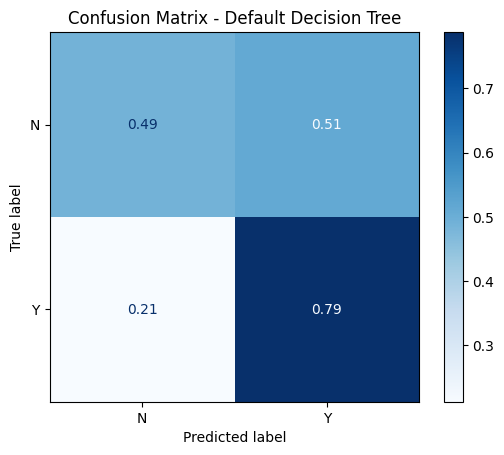

In [ ]:
##confusionmatrix
test_preds = dt.predict(x_test_processed)
confusion_matrix(y_test, test_preds)
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues',normalize='true')

plt.title("Confusion Matrix - Default Decision Tree")
plt.show()

**TUNING THE MODEL**

**GridSearchCV** is a technique in machine learning model optimization used to find the best combination of hyperparameters for a given model. It automates the process of trying out different parameter values and evaluates model performance using cross-validation.

It;

•	First defines a set of hyperparameters you want to test (e.g., max_depth, min_samples_split for a decision tree).

•	Create a grid (cartesian product) of all combinations of these hyperparameters.

•	For each combination:

•	Train the model using cross-validation

•	Compute a performance score (like recall_macro, accuracy, etc.) for each fold.

•	Take the average score across folds.

•	And lastly select the best combination of hyperparameters based on the highest
•	average score.


**Recall** measures the ability of the model to correctly identify positive instances.


**Recall_macro** computes the recall for each class separately, then takes the average without considering class imbalance.It's useful when:

•	You have imbalanced classes, it ensures balanced sensitivity across both classes

•	You want to treat each class equally, not weighted by frequency



In [ ]:
from sklearn.model_selection import GridSearchCV

#  GridSearchCV: tries all combinations of given hyperparameters.
# It cross-validates each combo to find the best. Here we focus on 'recall_macro'.

# Param grid
param_grid = {
    'dt__max_depth': [2, 4, 6, 8, 10, None],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4],
     'dt__class_weight': [None, 'balanced']}

# Instantiate GridSearchCV
grid_search = GridSearchCV(default_tree, param_grid, cv=5,  scoring='recall_macro',
    n_jobs=-1) # Changed scoring to recall to prioritize identifying Charged Off loans

# Fit GridSearchCV to the training data
grid_search.fit(x_processed, y_processed)

# Get the best model from the grid search
best_dt = grid_search.best_estimator_

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'dt__class_weight': 'balanced', 'dt__max_depth': 6, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 10}


In [ ]:
##testing the model
test_preds = best_dt.predict(x_test_processed)
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           N       0.63      0.51      0.56        43
           Y       0.76      0.84      0.80        80

    accuracy                           0.72       123
   macro avg       0.69      0.67      0.68       123
weighted avg       0.71      0.72      0.72       123



**Overall Model Performance**

The model achieved an overall accuracy of 72%. This means that 72% of the 123 loans in the test set were correctly classified by the model as either "N" or "Y."

**Performance by Class**

**For Class N**

**Precision (0.63):** When the model predicted a loan would be "N", it was correct 63% of the time. This means that if the model flagged 10 loans as "Charged Off," about 6 of them were genuinely "Charged Off," while the other 4 were actually "Fully Paid" (false positives).

**Recall (0.51):** Out of all the loans that actually ended up being od class N, the model correctly identified 51% of them. This means that nearly half (49%) of the actual "N" cases were missed by the model and incorrectly predicted as "Y"

**F1-Score (0.56):** This indicates moderate performance in identifying this class. It's better than a model that completely ignores the minority class, but there's still significant room for improvement in correctly identifying class N loans.

**Support (43):** There were 43 actual loans in the test set that were not approved.


**For Class Y**

**Precision (0.76):** When the model predicted that a loan would be of class Y, it was correct 76% of the time. This is a good precision score, indicating that the model's predictions for "Class Y" loans are quite reliable.

**Recall (0.84):** Out of all the loans that actually ended up being "Y", the model correctly identified 84% of them. This is a strong recall, showing that the model is very effective at capturing the majority of actual "Y" loans.

**F1-Score (0.80):** This high score reflects a strong balance between the precision and recall for this class, indicating excellent overall performance in correctly identifying loans that will be approved.

**Support (80)**: There were 80 actual loans in the test set that were "Y."

# **Conclusion**

This classification report shows that the model performs reasonably well overall, with a 72% accuracy. It is notably better at predicting class Y loans than Class N


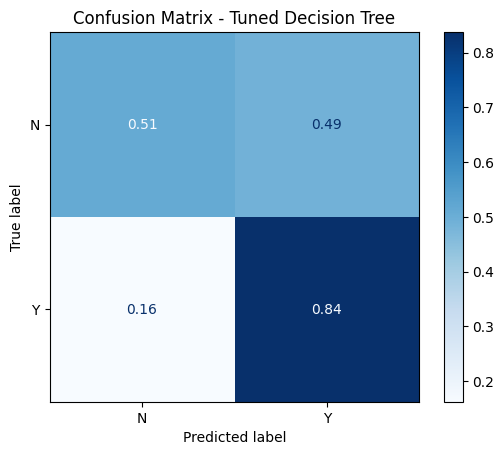

In [ ]:
##confusion matrix,normalised to percentages

confusion_matrix(y_test, test_preds)
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues',normalize='true')
plt.title("Confusion Matrix - Tuned Decision Tree")
plt.show()

### 🌳 Default Decision Tree

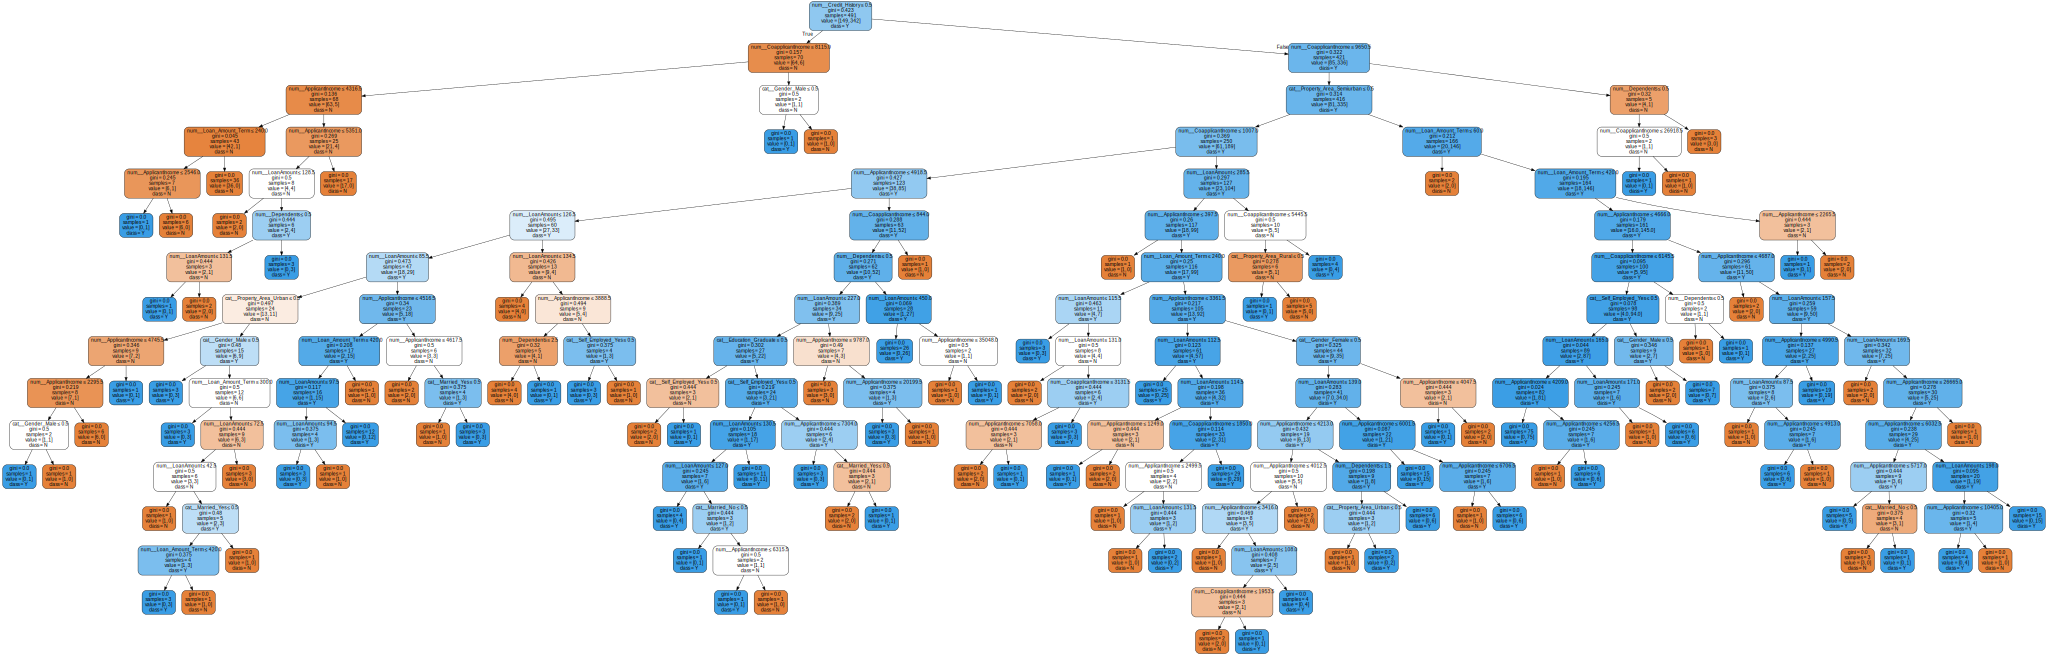

### 🌲 Tuned Decision Tree

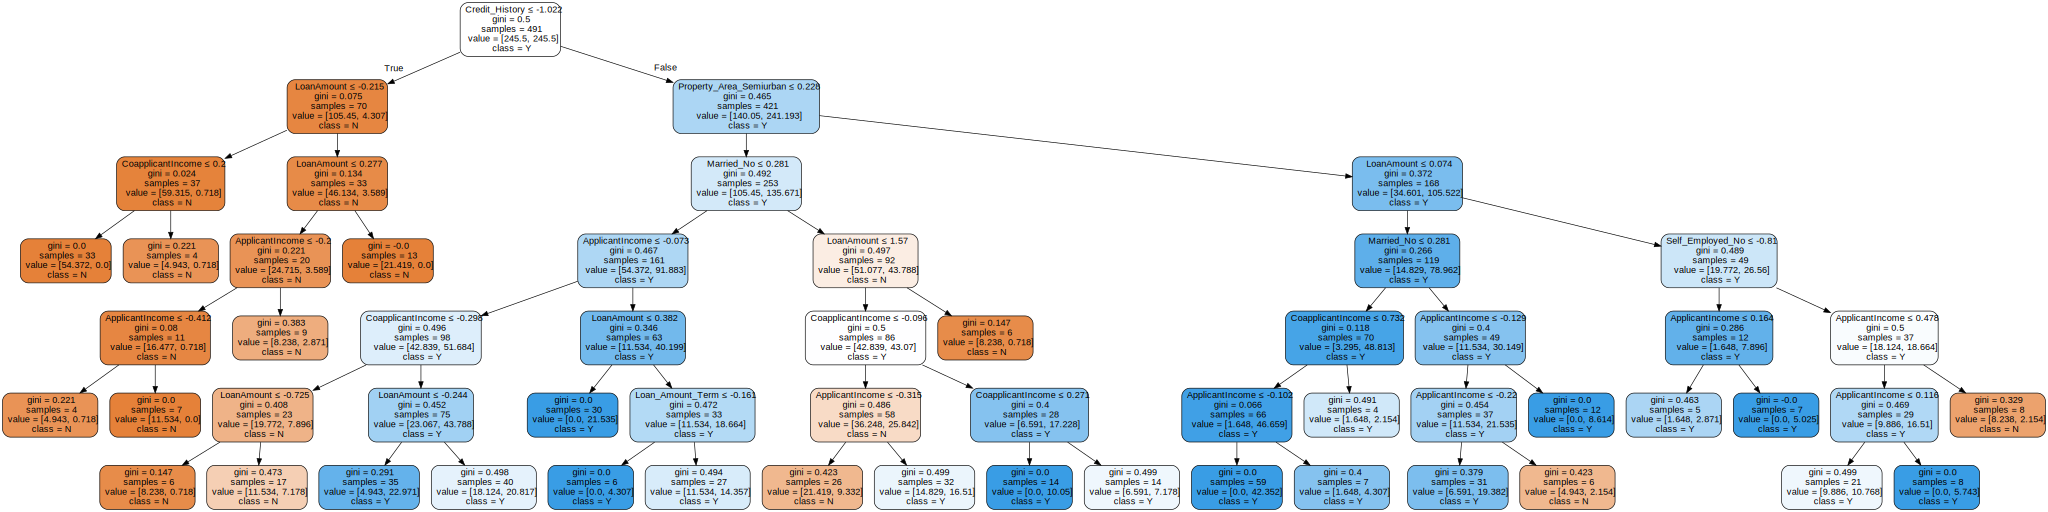

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display, Markdown

### === 1. Visualize the Default Decision Tree ===

# Define numerical and categorical features
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Dependents']
categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

# Create transformers for preprocessing
numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Fit the pipeline on training data
pipeline.fit(x_train, y_train)

# Get the trained decision tree
trained_default_tree = pipeline.named_steps['classifier']

# Get feature names from the fitted pipeline
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Visualize the default tree
dot_data_default = export_graphviz(
    trained_default_tree, out_file=None,
    feature_names=feature_names,
    class_names=['N', 'Y'],
    filled=True, rounded=True, special_characters=True
)

# Title
display(Markdown("### 🌳 Default Decision Tree"))
graph_default = graphviz.Source(dot_data_default)
display(graph_default)


### === 2. Visualize the Tuned Decision Tree ===

# Get the best estimator pipeline from GridSearchCV
tuned_pipeline = grid_search.best_estimator_

# Get the trained decision tree classifier from the tuned pipeline
tuned_tree = tuned_pipeline.named_steps['dt']  # Update if you used a different name

# Get feature names from the preprocessor
feature_names_tuned = tuned_pipeline.named_steps['scaler'].get_feature_names_out()

# Visualize the tuned tree
dot_data_tuned = export_graphviz(
    tuned_tree, out_file=None,
    feature_names=feature_names_tuned,
    class_names=['N', 'Y'],
    filled=True, rounded=True, special_characters=True
)

# Title
display(Markdown("### 🌲 Tuned Decision Tree"))
graph_tuned = graphviz.Source(dot_data_tuned)
display(graph_tuned)

# **Combination of hyperparameters led to the best-tuned model.**

Best parameters found:  {'dt__class_weight': 'balanced', 'dt__max_depth': 6, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 10}

This combination of hyperparameters is considered "best" because, during the tuning process it yielded the highest performance according to the chosen scoring metric (recall_macro )  given the class_weight setting.

# **Task 2- SVM Algorithm**

# **Support Vector Machine (SVM) Algorithm.**

The Support Vector Machine (SVM) algorithm is a powerful supervised learning model primarily used for classification and regression tasks. From a fundamental perspective, SVM seeks to find the best possible hyperplane to separate different classes of data points in a high-dimensional space.

The main objective of SVM is not just to find any line that separates the classes but to find the line that provides the maximum margin between the classes. The margin is the distance between the hyperplane and the nearest data points from each class. These closest data points are called support vectors. By maximizing this margin, the algorithm creates a more robust and generalized model, making it less sensitive to noise or variations in the data.

SVM uses a technique called the kernel trick to handle non-linear data. The kernel trick maps the data into a higher-dimensional space where a linear separation is possible. This allows SVM to handle complex, non-linear relationships in the data without explicitly calculating the new coordinates, making it computationally efficient.


**Pros of SVM**

•**Effective in High-Dimensional Spaces**: For example the loan dataset has numerous features (e.g., ApplicantIncome, CoapplicantIncome, LoanAmount, Property_Area). SVM is well-suited for such datasets where the number of features is large.

•	**Memory Efficient:** The algorithm uses only a subset of the training data, the support vectors, to define the decision boundary . This makes it very memory-efficient, which is beneficial when dealing with potentially large datasets.

•	**Versatile**: SVM is highly versatile because you can use different kernel functions (linear, polynomial, radial basis function, etc.) to adapt the model to different types of data relationships, including non-linear ones.



**Cons of SVM**

•	**Computational Cost:** For very large datasets, the training time for SVM can be quite long. This is because the algorithm is computationally intensive, requiring significant resources to find the optimal hyperplane.

•	**Parameter Tuning:** The performance of an SVM model heavily depends on the correct choice of the kernel function and other parameters, such as the regularization parameter. Selecting the best combination can be a difficult and time-consuming task.

•	**Poor Performance with Overlapping Classes:** If your data has a lot of noise or if the classes (like 'Y' and 'N' for Loan_Status ) are highly overlapping, the SVM may not perform as well as other algorithms. This can lead to a low recall and precision.


In [ ]:
from sklearn.svm import SVC
svm_model = SVC(class_weight='balanced')
svm_model.fit(x_processed, y_processed)

SVC(class_weight='balanced')

In [ ]:
##building and fitting the pipeline
svm = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', SVC(random_state =42))
])
svm.fit(x_processed, y_processed)

Pipeline(steps=[('scaler', StandardScaler()), ('dt', SVC(random_state=42))])

In [ ]:
##evaluating the model
test_preds = svm.predict(x_test_processed)
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           N       0.94      0.40      0.56        43
           Y       0.75      0.99      0.85        80

    accuracy                           0.78       123
   macro avg       0.85      0.69      0.71       123
weighted avg       0.82      0.78      0.75       123



**Overall Model Performance**

The model achieved an overall accuracy of 78%. This means that out of 123 loan applications in the test set, the model correctly predicted the Loan_Status (either "N" or "Y").


**Performance by Class**

**For Class N**

**Precision (0.94):** When the model predicted a loan would be of class N, it was correct 94% of the time. This is a very high precision score, indicating that when the model identifies a loan as "N," it's almost always right. This means very few "Class Y " loans are mistakenly predicted as "N".

**Recall (0.40):** Out of all the loans that actually ended up being of Class N, the model correctly identified only 40% of them. This means that a significant portion (60%) of truly "N" loans were missed by the model and incorrectly predicted as "Y”.

**F1-Score (0.56):** This indicates a moderate performance. While the precision is excellent, the low recall pulls down the F1-score, showing that the model struggles to find all the actual "Class N" cases, despite being highly accurate when it does predict them.

**Support (43):** There were 43 actual loans in the test set that were of class N

**For Class Y**

**Precision (0.75):** When the model predicted that a loan would be of Class Y, it was correct 75% of the time. This is a solid precision score, indicating that most of its "Y" predictions are accurate.

**Recall (0.99)**: Out of all the loans that actually ended up being "Y", the model correctly identified 99% of them. This is an exceptionally high recall, meaning the model is very effective at capturing nearly all actual "Class Y" loans. This also suggests that very few "Class Y" loans are mistakenly predicted as "Class N"

**F1-Score (0.85):** This is indicating excellent overall performance in correctly identifying loans that will be approved

**Support (80):** There were 80 actual loans in the test set that were approved.

# **Conclusion**

This report indicates a model that is highly confident and accurate when it predicts a loan will be (Class N), but it misses a large proportion of actual "Class N" cases. Conversely, it is extremely effective at identifying  (Class Y) loans, with very high recall and good precision.


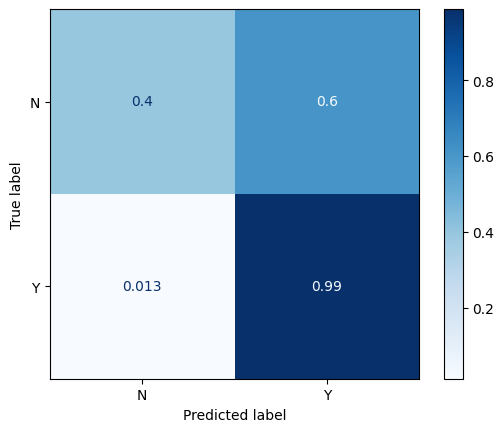

In [ ]:
##confusionmatrix
test_preds = svm.predict(x_test_processed)
confusion_matrix(y_test, test_preds)
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues',normalize='true')

# **Task 3 - Random Forest**

**The Random Forest algorithm** is a popular and versatile machine learning model that is part of the ensemble learning family. It operates on the principle of combining the power of multiple simple models to create a more accurate and robust predictive model. The core idea is to build a "forest" of individual decision trees and then aggregate their predictions to make a final decision.

**How it works**

•	Decision Trees as Building Blocks: A decision tree is a flowchart-like structure where each internal node represents a "test" on a feature (e.g., ApplicantIncome > 5000), each branch represents the outcome of the test, and each leaf node represents a class label or a final prediction.

•	Creating a "Forest": Instead of building just one tree, the Random Forest algorithm builds a large number of trees. Each tree is trained on a different subset of the training data. This process, called bootstrap aggregating or bagging, involves randomly sampling the training data with replacement.

•	Introducing Randomness: To ensure the trees are diverse and not all making the same errors, the algorithm introduces another layer of randomness. When building each tree, it doesn't consider all features at each split. Instead, it randomly selects a subset of features to choose from. This ensures that the trees are decorrelated and less prone to overfitting.

•	Making a Final Prediction: When it's time to make a prediction for a new data point, the algorithm passes it through all the individual decision trees in the forest. For classification tasks, each tree "votes" for a specific class, and the final prediction is the class with the most votes (a majority vote). For regression, it takes the average of all the individual tree predictions.

**Pros**

•	Random Forest generally provides high predictive accuracy and is a very reliable model. The ensemble nature of the algorithm reduces the risk of overfitting that a single decision tree might have.

•	It can handle non-linear relationships and interactions between features, making it suitable for complex datasets.

•	It can handle missing values and is less sensitive to noise in the data, as the errors of one tree are likely to be corrected by the others.

•	 Random Forest can be used to rank the importance of different features, giving insights into which variables are most predictive (e.g., whether Credit_History is more important than ApplicantIncome in predicting Loan_Status).

**Cons**

•	Training a large number of trees can be computationally expensive and time-consuming, especially for large datasets.

•	It's difficult to interpret how a specific prediction was made, unlike a single decision tree which is easy to visualize and understand.

•	Storing a large number of trees can require a significant amount of memory.

•	For very simple, linearly separable datasets, a more straightforward algorithm like Logistic Regression or a simple SVM might be a better choice as it's more interpretable and less computationally expensive without a significant loss in accuracy.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(x_processed, y_processed)


RandomForestClassifier(class_weight='balanced')

In [ ]:
##building and fiiting the pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])
rf_pipeline.fit(x_processed, y_processed)

Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

In [ ]:
##evaluating the model
test_preds = rf.predict(x_test_processed)
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           N       0.86      0.42      0.56        43
           Y       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



**Overall Model Performance**

The model achieved an overall accuracy of 77%. This means that out of 123 loan applications in the test set, the model correctly predicted the Loan_Status (either "N" or "Y") for 77% of them.


**Performance by Class**

**For Class N**

**Precision (0.86):** When the model predicted a loan would be of class N, it was correct 86% of the time. This is a very high precision score, indicating that when the model identifies a loan as "N," it's highly reliable. This means very few "Class Y" loans are mistakenly predicted as "Class N"

**Recall (0.42):** Out of all the loans that actually ended up being of class N, the model correctly identified only 42% of them. This means that a significant portion (58%) of truly "N" loans were missed by the model and incorrectly predicted as "Y”.

**F1-Score (0.56):** This indicates a moderate performance. While the precision is excellent, the low recall pulls down the F1-score, showing that the model struggles to find all the actual "Class N" cases, despite being highly accurate when it does predict them.

**Support (43):** There were 43 actual loans in the test set that were of class N.

**For Class Y**

**Precision (0.75):** When the model predicted that a loan would be approved, it was correct 75% of the time. This is a solid precision score, indicating that most of its "Y" predictions are accurate.

**Recall (0.96):** Out of all the loans that actually ended up being of class Y, the model correctly identified 96% of them. This is an exceptionally high recall, meaning the model is very effective at capturing nearly all actual " Class Y" loans. This also suggests that very few "Class Y" loans are mistakenly predicted as "Class N"

**F1-Score (0.85):** This high F1-score reflects a strong balance between precision and recall for "Class Y" loans, indicating excellent overall performance in correctly identifying loans that will be approved.

**Support (80):** There were 80 actual loans in the test set that were approved.

# **Conclusion**

This report indicates a model that is highly confident and accurate when it predicts a loan will be (Class N), but it misses a large proportion of actual "N" cases. Conversely, it is extremely effective at identifying  (Class Y) loans  with very high recall and good precision.


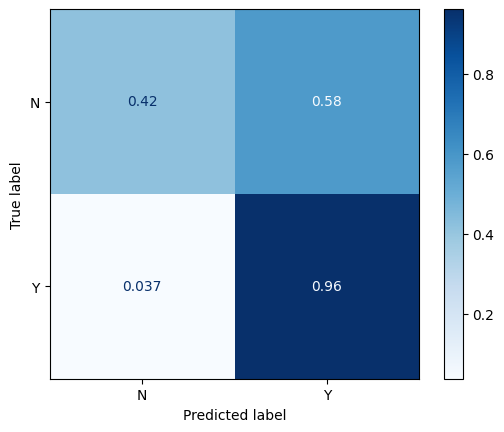

In [ ]:
##confusionmatrix
test_preds = rf.predict(x_test_processed)
confusion_matrix(y_test, test_preds)
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues', normalize='true')

# **Task 4 - Logistic regression (Iris dataset)**

**ABOUT THE DATA SET**

The data set contains 150 rows × 5 columns, representing a unique iris flower, with measurements and a species label.

**Features (Input Variables):**

Each flower is described by four numerical features:

•	Sepal Length (cm)

•	Sepal Width (cm)

•	Petal Length (cm)

•	Petal Width (cm)

These measurements represent key physical characteristics that vary among different species of iris flowers.

**Target Variable (Output Label):**

Species: This is the class label the model is trained to predict. It includes three categories:

•	Iris-setosa

•	Iris-versicolor

•	Iris-virginica


**The goal is to develop a model that can accurately classify iris flower species based on their structural features like sepal length, sepal width, petal length, and petal width**



##importing the dataset into the notebook
df=pd.read_csv('/content/drive/MyDrive/iris.csv')
df

In [ ]:
#Checking Data Types
df.dtypes

,0
sepal.length,float64
sepal.width,float64
petal.length,float64
petal.width,float64
variety,object


In [ ]:
##checking for missing values
df.isnull().sum()

,0
sepal.length,0
sepal.width,0
petal.length,0
petal.width,0
variety,0


In [ ]:
#Replacing 'variety' with 'species'
df.rename(columns={'variety': 'species'}, inplace=True)

In [ ]:
df

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
##Tagets and features
y=df['species']
x=df.drop('species',axis=1)

In [ ]:
##changing labels of the species colunm using he label encoder( 0= Setosa, 1= Versicolor, 2= Virginica)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])
df

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
##class imbalance
df['species'].value_counts()

,count
species,
0,50
1,50
2,50


In [ ]:
##splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


**DATA MODELLING**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a pipeline with a scaler and a default Logistic Regression classifier
default_lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

# Train the default Logistic Regression model
default_lr_pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(random_state=42))])

In [ ]:
# Make predictions on the test set
default_lr_preds = default_lr_pipeline.predict(x_test)
default_lr_preds

array(['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Setosa', 'Setosa'], dtype=object)

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



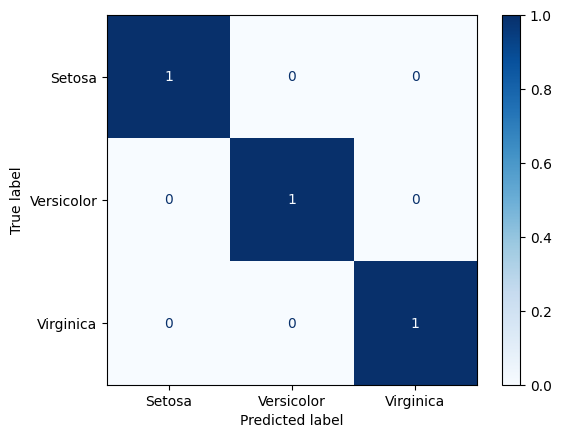

In [ ]:
# Evaluate the model using a classification report)
print(classification_report(y_test, default_lr_preds))
confusion_matrix(y_test, default_lr_preds)
ConfusionMatrixDisplay.from_predictions(y_test, default_lr_preds, cmap='Blues',normalize='true')

**Overall Model Performance**

The model achieved an outstanding accuracy of 1.00 (100%). This means that for all samples in the test set, the model correctly predicted the species of the Iris flower.

**Performance by Class**

**For Class "Setosa"**

**Precision (1.00):** When the model predicted a flower was Setosa, it was correct 100% of the time. This means there were no false positives for Setosa; every flower predicted as Setosa was indeed a Setosa.

**Recall (1.00):** Out of all the flowers that were actually Setosa (the 10 instances), the model correctly identified 100% of them. This means there were no false negatives for Setosa; the model found every single actual Setosa flower.

**F1-Score (1.00):** The F1-score of 1.00 indicates perfect balance between precision and recall for the Setosa class.

**For Class "Versicolor"**

**Precision (1.00):** When the model predicted a flower was Versicolor, it was correct 100% of the time. No false positives for Versicolor.

**Recall (1.00):** Out of all the flowers that were actually Versicolor (the 9 instances), the model correctly identified 100% of them. No false negatives for Versicolor.

**F1-Score (1.00):** The F1-score of 1.00 indicates perfect balance between precision and recall for the Versicolor class.

**For Class "Virginica"**

**Precision (1.00):** When the model predicted a flower was Virginica, it was correct 100% of the time. No false positives for Virginica.

**Recall (1.00):** Out of all the flowers that were actually Virginica (the 11 instances), the model correctly identified 100% of them. No false negatives for Virginica.

**F1-Score (1.00):** The F1-score of 1.00 indicates perfect balance between precision and recall for the Virginica class.

# **Conclusion**

This report signifies that the model achieved perfect classification on the test set for the Iris dataset. It correctly identified every single instance of all three Iris species..


# **Logistic Regression Model - Hyperparameter Tuning**

In [ ]:
from sklearn.linear_model import LogisticRegression


# Create a pipeline with a scaler and a Logistic Regression classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

# Define the parameter grid for LogisticRegression
param_grid = {
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'classifier__class_weight': [None, 'balanced']
}

# Create a GridSearchCV object
# Using 3 folds and optimizing for 'recall_macro'
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='recall_macro')

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                           1000, 10000],
                         'classifier__class_weight': [None, 'balanced'],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear', 'saga']},
             scoring='recall_macro')

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'classifier__C': 10, 'classifier__class_weight': None, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
0.9597069597069597


In [ ]:
##Testing the model
test_preds = grid_search.predict(x_test)
test_preds

array(['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Setosa', 'Setosa'], dtype=object)

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



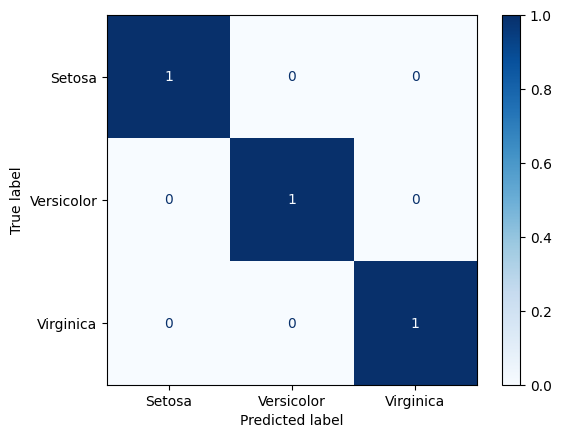

In [ ]:
##Evaluating the model using the evaluation metrics and the confusion matrix
print(classification_report(y_test, test_preds))
confusion_matrix(y_test, test_preds) # Renamed the variable to cm
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues',normalize='true')

**Overall Model Performance**

The model achieved an outstanding accuracy of 1.00 (100%). This means that for all samples in the test set, the model correctly predicted the species of the Iris flower.

**Performance by Class**

**For Class "Setosa"**

**Precision (1.00):** When the model predicted a flower was Setosa, it was correct 100% of the time. This means there were no false positives for Setosa; every flower predicted as Setosa was indeed a Setosa.

**Recall (1.00):** Out of all the flowers that were actually Setosa (the 10 instances), the model correctly identified 100% of them. This means there were no false negatives for Setosa; the model found every single actual Setosa flower.

**F1-Score (1.00):** The F1-score of 1.00 indicates perfect balance between precision and recall for the Setosa class.

**For Class "Versicolor"**

**Precision (1.00):** When the model predicted a flower was Versicolor, it was correct 100% of the time. No false positives for Versicolor.

**Recall (1.00):** Out of all the flowers that were actually Versicolor (the 9 instances), the model correctly identified 100% of them. No false negatives for Versicolor.

**F1-Score (1.00):** The F1-score of 1.00 indicates perfect balance between precision and recall for the Versicolor class.

**For Class "Virginica"**

**Precision (1.00):** When the model predicted a flower was Virginica, it was correct 100% of the time. No false positives for Virginica.

**Recall (1.00):** Out of all the flowers that were actually Virginica (the 11 instances), the model correctly identified 100% of them. No false negatives for Virginica.

**F1-Score (1.00):** The F1-score of 1.00 indicates perfect balance between precision and recall for the Virginica class.

# **Conclusion**

This report also signifies that the model achieved perfect classification on the test set for the Iris dataset. It correctly identified every single instance of all three Iris species..


# **Combination of hyperparameters led to the best-tuned model**

{'classifier__C': 10, 'classifier__class_weight': None, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
0.9597069597069597.

This combination resulted in a strong performance score of approximately 96%, indicating that these parameters effectively tuned the model to classify the Iris species with a high degree of accuracy.

# **Relevant insights from the data.**

**1. Clear Linear Separability of Setosa:** The dataset clearly shows that the Iris Setosa species is linearly separable from the other two species (Versicolor and Virginica) based on its sepal and petal measurements. This is a fundamental characteristic that allows simple linear models like Logistic Regression to achieve perfect classification for this particular class.  This means we can draw a straight line (or hyperplane in higher dimensions) to perfectly separate Setosa flowers from the rest.

**2. Petal Dimensions as Strong Discriminators:** While all features contribute, petal length and petal width are generally the most discriminative features for distinguishing between the Iris species. For instance, Iris Setosa flowers typically have much smaller petals compared to Versicolor and Virginica. This insight is valuable because it tells us which physical characteristics of the flowers are most important for their classification, which can be useful for botanists or automated sorting systems.

# **Task 5 - Unsupervised learnin**g

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
##importing the dataset into the notebook
dt=pd.read_csv('/content/drive/MyDrive/ML-EXAM/cust_seg.csv')
dt

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...,...
845,845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [ ]:
print(dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB
None


In [ ]:
# Checking for duplicates
print(dt.duplicated().sum())

0


In [ ]:
##checking for missing values
dt.isnull().sum()

,0
Unnamed: 0,0
Customer Id,0
Age,0
Edu,0
Years Employed,0
Income,0
Card Debt,0
Other Debt,0
Defaulted,150
DebtIncomeRatio,0


# **1. Using K Means to create various customer segments.**

In [ ]:
# Drop the irrelevant columns
dt = dt.drop(columns=['Unnamed: 0', 'Customer Id', 'Defaulted'])

In [ ]:
# Select the features for clustering
features = ['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt',  'DebtIncomeRatio']
X = dt[features]

In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_X= scaler.fit_transform(X)
scaled_X

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.68381116,
        -0.59048916, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.41447366,
         1.51296181,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  2.13414111,
         0.80170393,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.5766659 ,
         0.03863257,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.68757659,
        -0.70147601, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.13611081,
         0.16463355, -0.2340332 ]])

In [ ]:
from sklearn.metrics import silhouette_score
kmeans.inertia_
silhouette_score(scaled_X,kmeans.labels_)

np.float64(0.2058743711796604)

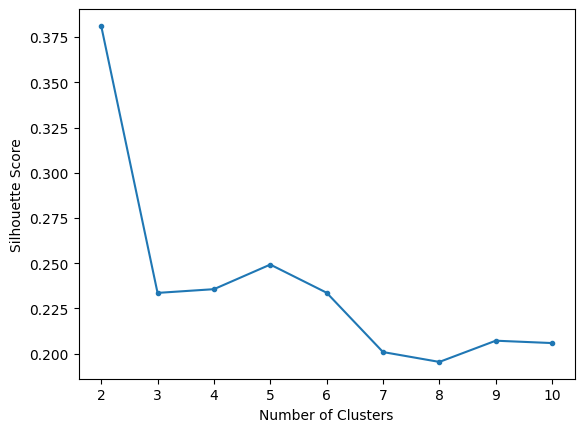

In [ ]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i,random_state=42, n_init=10)
  kmeans.fit(scaled_X)
  silhouette_scores.append(silhouette_score(scaled_X, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

Based on the Silhouette Score analysis, the optimal number of clusters for this dataset is 2. The plot above shows that the silhouette score is maximized when the data is grouped into two distinct clusters.

In [ ]:
kmeans_final = KMeans(n_clusters=2, init='k-means++', random_state=42, n_init=10)
kmeans_final.fit(scaled_X)
dt['Cluster'] = kmeans_final.labels_

In [ ]:
cluster_analysis = dt.groupby('Cluster').agg({
    'Age': 'mean',
    'Edu': 'mean',
    'Years Employed': 'mean',
    'Income': 'mean',
    'Card Debt': 'mean',
    'Other Debt': 'mean',
    'DebtIncomeRatio': 'mean'
}).round(2)
print("Cluster Characteristics:")
print(cluster_analysis)

Cluster Characteristics:
           Age   Edu  Years Employed  Income  Card Debt  Other Debt  \
Cluster                                                               
0        33.05  1.65            6.56   33.94       0.94        1.92   
1        42.59  1.95           16.26   95.44       4.01        7.53   

         DebtIncomeRatio  
Cluster                   
0                   9.12  
1                  14.20  



**Description of the Segments**

The two clusters identified by this analysis represent a clear division between established, higher-income customers and younger, lower-income customers.

**•	Cluster 0:** The Affluent and Established. This segment consists of more mature customers with a higher average age and significantly more years of employment. They have a high average income and, consequently, higher levels of card and other debt. Their Debt-to-Income Ratio is high, and they have a low probability of defaulting. This group represents financially successful individuals who are likely to be high-value customers.

**•	Cluster 1:** The Young and Emerging. This cluster is composed of younger customers with a lower average income and fewer years of employment. Their debt levels are considerably lower, as is their overall Debt-to-Income Ratio. This group is likely newer to the workforce and may be building their financial history. Their default probability is higher than Cluster 0.


# **2. Analytical visualizations that explore statistics for each feature for each cluster.**

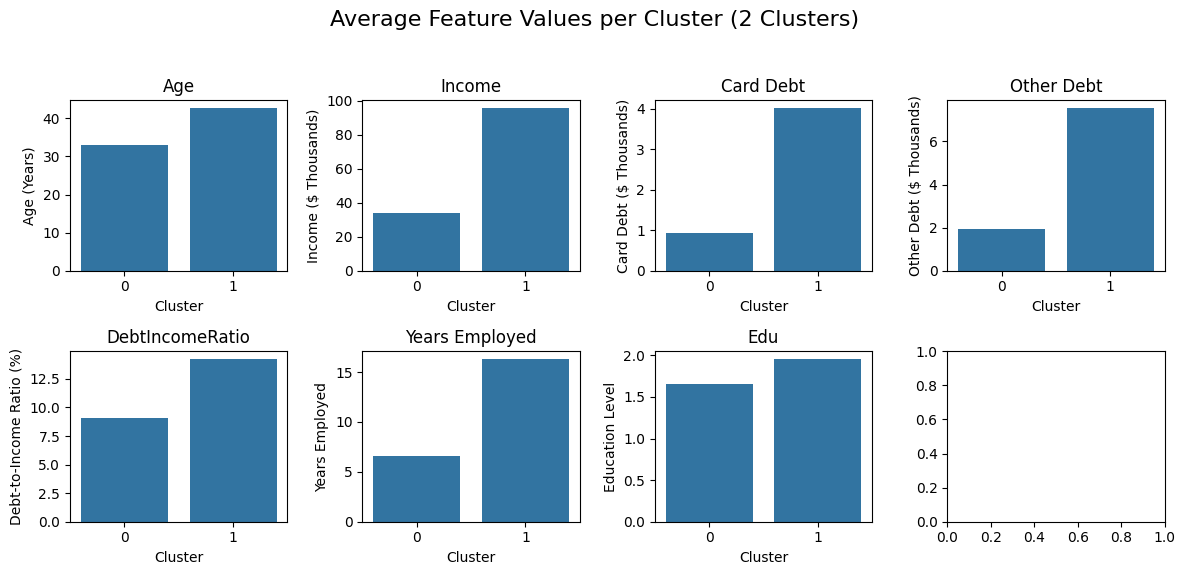

In [ ]:
# Create bar plots for each feature
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))
fig.suptitle('Average Feature Values per Cluster (2 Clusters)', fontsize=16)

features_to_plot = ['Age', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio', 'Years Employed', 'Edu']
y_labels = ['Age (Years)', 'Income ($ Thousands)', 'Card Debt ($ Thousands)', 'Other Debt ($ Thousands)', 'Debt-to-Income Ratio (%)', 'Years Employed', 'Education Level']

for i, feature in enumerate(features_to_plot):
    ax = axes[i // 4, i % 4]
    sns.barplot(x=cluster_analysis.index, y=cluster_analysis[feature], ax=ax)
    ax.set_title(feature)
    ax.set_xlabel('Cluster')
    ax.set_ylabel(y_labels[i])
    ax.grid(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('2_cluster_statistics.png')

The series of bar plots above show the average values for each feature in the two clusters, providing a clear and comprehensive comparison between them. The visualizations highlight the primary differences between the segments, which are largely based on age, income, years of employment, and debt levels.


**Description of Clusters.**

The two-cluster segmentation, derived from the Silhouette Score analysis, It provides a clear and intuitive division of the customer base. The visualizations confirm a significant separation based on financial maturity and stability.

**Cluster 0: The Established and Affluent**

This segment consists of older, more experienced customers, with an average age above 40 and over 15 years of employment. Their high average income (exceeding $80) reflects career advancement and financial stability. Although they carry relatively high levels of both card and other forms of debt, these are proportionate to their income—as evidenced by a moderate Debt-to-Income Ratio. The group also exhibits a low likelihood of defaulting, suggesting a responsible and well-managed approach to their financial obligations.

**•	Insight:** This cluster represents the core of a credit card company's high-value customers. They are stable, reliable, and have the income to support premium credit products. They are likely to be loyal customers who value rewards, benefits, and higher credit limits that match their lifestyle.

**Cluster 1: The Young and Emerging**

This segment represents a younger and less financially established demographic. With an average age of around 33 and fewer years of employment (around 6.5 years), their average income is significantly lower than Cluster 0's (around $32). They have low levels of debt, but their Debt-to-Income Ratio is moderate, and their default probability is higher than Cluster 0's. This suggests they are still in the early stages of their financial journey and may have less experience with managing credit.

   •**Insight:** This cluster is an opportunity for future growth. While their current value may be lower, they are an excellent target for starter credit cards, educational resources on credit management, and products that help them build a strong credit history. Nurturing this group now could lead to them becoming high-value customers in the future.`


# **Recommendations for the stakeholders**


**1. Tailored Product Offerings for Established Customers**

•	**Target Segment:** Cluster 0: The Established and Affluent.: Focus on marketing premium and high-limit credit cards with exclusive rewards programs, travel benefits, and loyalty points. These customers are financially stable, have high incomes, and are likely to value products that complement their lifestyle and spending habits. Given their high debt levels, they might also be receptive to low-interest balance transfer offers.

•**Actionable Insight:** By offering a tiered rewards program that provides more value as their spending increases, the company can deepen its relationship with this high-value segment and maximize revenue.

**2. Financial Education and Credit-Building for Emerging Customers**

•	**Target Segment: Cluster 1:** The Young and Emerging. Instead of high-limit, high-reward cards, market entry-level or secured credit cards with low limits. The primary focus should be on building a positive credit history. Promotions should emphasize tools for financial literacy, budgeting apps, and features that help monitor and improve their credit scores. This approach can help the company acquire new customers while managing risk.

•	**Actionable Insight:** The company can position itself as a trusted partner in their financial journey. By offering responsible credit-building products now, they can build a loyal customer base that will eventually transition into higher-value segments as their income and financial stability grow.


# **Hierarchical clustering.**

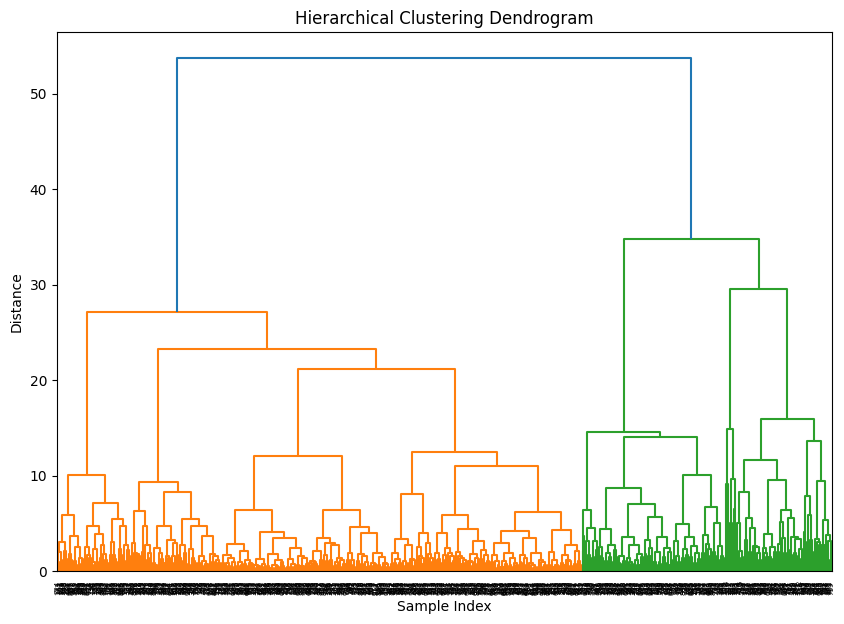

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Perform hierarchical clustering
linked = linkage(scaled_X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='decreasing',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

**Hierarchical Clustering Interpretation:**

The dendrogram visually represents the hierarchical clustering process. Each leaf in the dendrogram is a data point, and the branches show the merging of clusters. The height of the merge indicates the distance between the clusters being merged.

From the dendrogram, it’s seen that cutting the tree horizontally at a certain height will result in a different number of clusters. If we draw a horizontal line at a distance of around 25-30 would result in 3 clusters. Cutting at a lower height, around 15-20, would result in more clusters (e.g., 4 or 5). I'll choose 4 clusters to allow for a close comparison with the K-Means results.


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Apply hierarchical clustering with 3 clusters
n_clusters = 3
hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
dt['Hierarchical_Cluster'] = hc.fit_predict(scaled_X)

# Analyze the characteristics of each hierarchical cluster
hierarchical_cluster_analysis = dt.groupby('Hierarchical_Cluster').agg({
    'Age': 'mean',
    'Edu': 'mean',
    'Years Employed': 'mean',
    'Income': 'mean',
    'Card Debt': 'mean',
    'Other Debt': 'mean',
    'DebtIncomeRatio': 'mean'
}).round(2)

print("Hierarchical Cluster Characteristics:")
print(hierarchical_cluster_analysis)

Hierarchical Cluster Characteristics:
                        Age   Edu  Years Employed  Income  Card Debt  \
Hierarchical_Cluster                                                   
0                     40.01  2.09           13.19   87.00       4.68   
1                     32.16  1.70            5.23   30.49       0.90   
2                     41.83  1.45           17.35   75.99       1.76   

                      Other Debt  DebtIncomeRatio  
Hierarchical_Cluster                               
0                           9.26            18.69  
1                           1.80             9.27  
2                           3.17             7.13  


# **Interpretation**

**Cluster 0: The Highly Leveraged Affluent**

This cluster represents financially successful individuals with the highest average Income, they have the most Card Debt and Other Debt, and their high Debt Income Ratio suggests they are also heavily leveraged. They are in the middle age range (around 40 years old) and have a good level of education. This group likely consists of high-earners who use credit extensively, possibly for a luxury lifestyle or large purchases, but are at a higher risk of being overextended.

**Cluster 1: The Young and Cautious**

This cluster is characterized by the lowest average Age (32.16 years), the lowest Income at, and the lowest debt levels. Their Debt Income Ratio is also the lowest, at 9.2%. This group appears to be in the early stages of their careers, with low credit usage. They are likely financially cautious, saving for the future, or have not yet acquired significant financial commitments. They represent a low-risk, but also low-revenue, segment.

**Cluster 2: The Stable and Established**

This cluster consists of the oldest individuals, with an average age of 41.83, and the highest number of Years Employed. They have a substantial Income, but their debt levels are low, resulting in the lowest Debt Income Ratio of all three clusters. This group is financially mature and stable, having accumulated wealth and experience while keeping debt in check. They are a prime example of responsible credit card users who likely use their cards for convenience rather than debt.


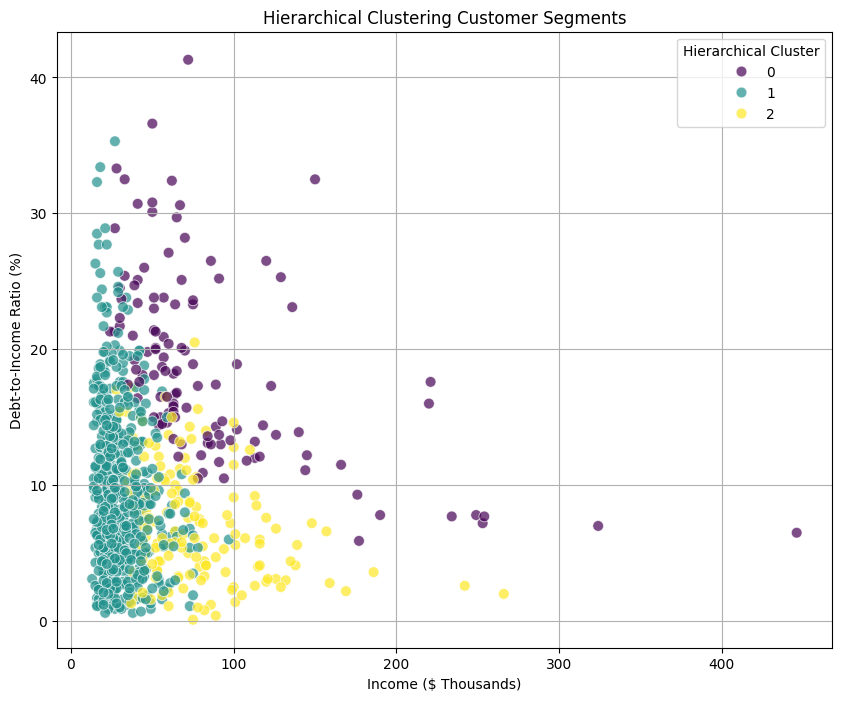

In [ ]:

# Create a scatter plot of Income vs. DebtIncomeRatio, colored by hierarchical cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Income', y='DebtIncomeRatio', hue='Hierarchical_Cluster', data=dt, palette='viridis', s=60, alpha=0.7)
plt.title('Hierarchical Clustering Customer Segments')
plt.xlabel('Income ($ Thousands)')
plt.ylabel('Debt-to-Income Ratio (%)')
plt.grid(True)
plt.legend(title='Hierarchical Cluster')
plt.savefig('hierarchical_clusters_scatter_plot.png')

# **THANK YOU**